#

In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
print(f"data shape: {data.shape}")
data.head()

data shape: (45000, 4)


,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [3]:
data['Day'] = data['Timestamp'].dt.date
day_ave = data.groupby(['Day']).mean()
day_ave

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


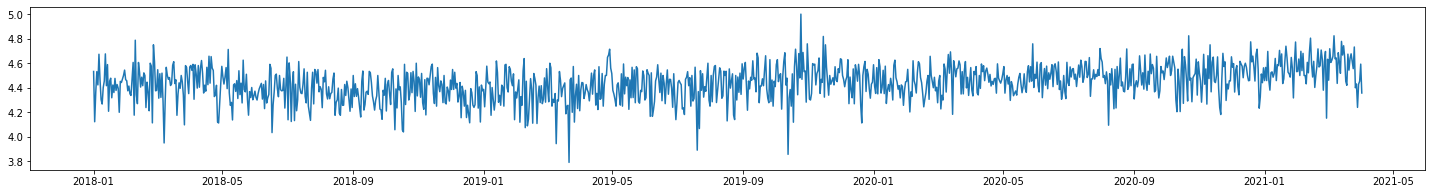

In [4]:
plt.figure(figsize=(25, 3))
plt.plot(day_ave.index, day_ave['Rating'])

## Rating average by week

In [6]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U') #avoid merging weeks in different year 
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13


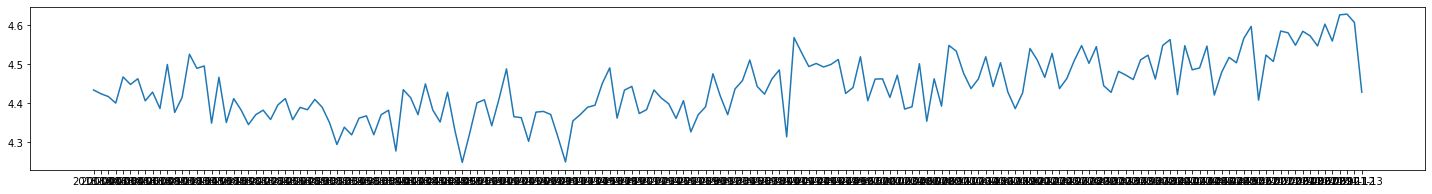

In [8]:
week_ave = data.groupby(['Week']).mean()

plt.figure(figsize=(25, 3))
plt.plot(week_ave.index, week_ave['Rating'])

## Rating average by month

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m') #avoid merging months in different year 
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04


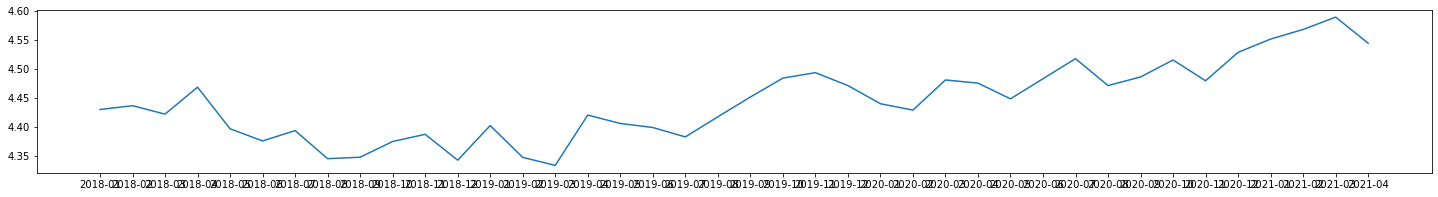

In [10]:
month_ave = data.groupby(['Month']).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_ave.index, month_ave['Rating'])

## Rating average by month by course

In [13]:
month_ave_cour = data.groupby(['Month', 'Course Name']).mean().unstack() #unstack Pivot a level of the index labels
month_ave_cour

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

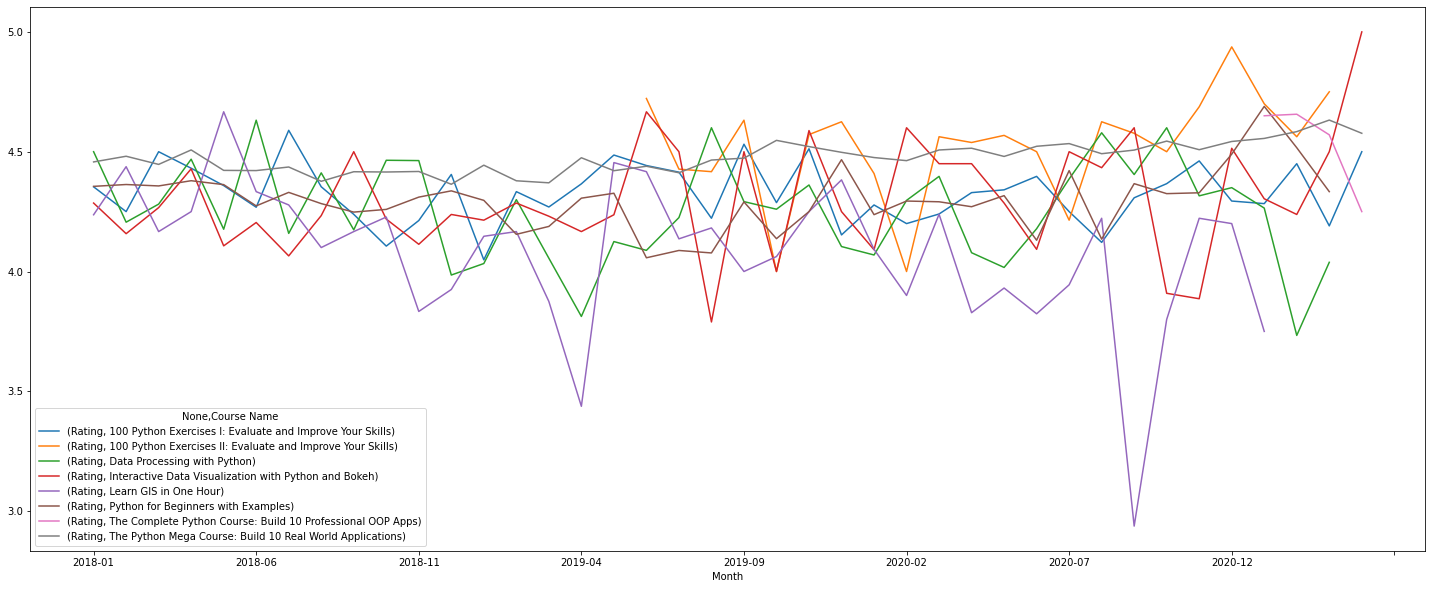

In [20]:
month_ave_cour.plot(figsize=(25, 10))

In [37]:
data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


### What day are people the happiest?

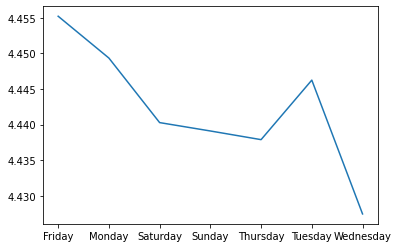

In [22]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')

weekday_ave = data.groupby(['Weekday']).mean()

plt.plot(weekday_ave.index, weekday_ave['Rating'])

In [23]:
weekday_ave = weekday_ave.sort_values('Weekday')
weekday_ave #weekday is alphabetical order

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


In [27]:
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


In [28]:
weekday_ave = data.groupby(['Weekday', 'Daynumber']).mean()

weekday_ave = weekday_ave.sort_values('Daynumber')
weekday_ave #weekday is alphabetical order

,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


In [29]:
weekday_ave.index # has two indices, use get_level_values to choose index

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynumber'])

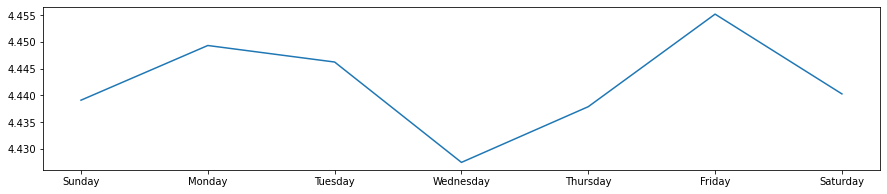

In [32]:
plt.figure(figsize=(15, 3))
plt.plot(weekday_ave.index.get_level_values(0), weekday_ave['Rating'])

### Number of ratings by course

In [34]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1644e88d7c8>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

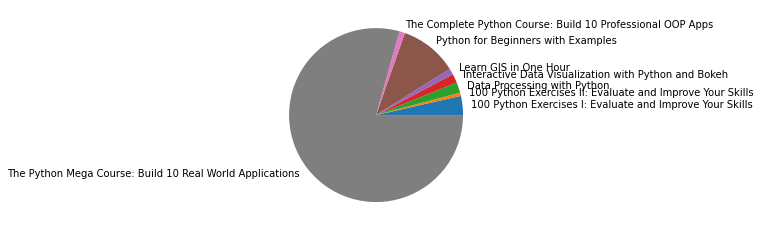

In [36]:
plt.pie(share, labels = share.index)